# Solutions

1. [Datetime and Timedelta](#1.-Datetime-and-Timedelta)
1. [Introduction to Time Series](#2.-Introduction-to-Time-Series)
1. [Grouping by Time](#3.-Grouping-by-Time)
1. [Rolling Windows](#4.-Rolling-Windows)
1. [Grouping by Time and another Column](#5.-Grouping-by-Time-and-another-Column)

## 1. Datetime and Timedelta

In [1]:
import pandas as pd

### Exercise 1
<span  style="color:green; font-size:16px">What day of the week was Jan 15, 1997?</span>

In [2]:
dt = pd.to_datetime('Jan 15, 1997')
dt.day_name()

'Wednesday'

### Exercise 2
<span  style="color:green; font-size:16px">Was 1925 a leap year?</span>

In [3]:
dt = pd.to_datetime('Jan 1, 1924')
dt.is_leap_year

True

### Exercise 3
<span  style="color:green; font-size:16px">What year will it be 1 million hours after the UNIX epoch?</span>

In [4]:
dt = pd.to_datetime(10 ** 6, unit='h')
dt

Timestamp('2084-01-29 16:00:00')

In [5]:
dt.year

2084

### Exercise 4
<span  style="color:green; font-size:16px">Create the datetime July 20, 1969 at 2:56 a.m. and 15 seconds.</span>

In [6]:
dt = pd.to_datetime('1969-07-20 2:56:15')
dt

Timestamp('1969-07-20 02:56:15')

### Exercise 5
<span  style="color:green; font-size:16px">Neil Armstrong stepped on the moon at the time in the last Exercise. How many days have passed since that happened? Use the string 'today' when creating your datetime.</span>

In [7]:
dt1 = pd.to_datetime('1969-07-20 2:56:15')
dt2 = pd.to_datetime('today')
dt2

Timestamp('2020-02-19 14:03:41.299755')

In [8]:
td = dt2 - dt1
td

Timedelta('18476 days 11:07:26.299755')

In [9]:
td.days

18476

### Exercise 6
<span  style="color:green; font-size:16px">Which is larger - 35 days or 700 hours?</span>

In [10]:
td1 = pd.to_timedelta(35, unit='d')
td2 = pd.to_timedelta(700, unit='h')

In [11]:
td1

Timedelta('35 days 00:00:00')

In [12]:
td2

Timedelta('29 days 04:00:00')

In [13]:
td1 > td2

True

Can also use a string for hours

In [14]:
pd.to_timedelta('700 hours')

Timedelta('29 days 04:00:00')

In [15]:
pd.to_timedelta('700h')

Timedelta('29 days 04:00:00')

### Exercise 7

<span style="color:green; font-size:16px">The City of Houston employee data was retrieved on June 1, 2019. Can you calculate the exact amount of years of experience and assign as a new column named `experience`?</span>

In [16]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])

One year is approximately 365.25 days.

In [17]:
pull_date = pd.to_datetime('2019-6-1')
one_year = pd.to_timedelta(365.25, unit='D')

In [18]:
pull_date

Timestamp('2019-06-01 00:00:00')

In [19]:
one_year

Timedelta('365 days 06:00:00')

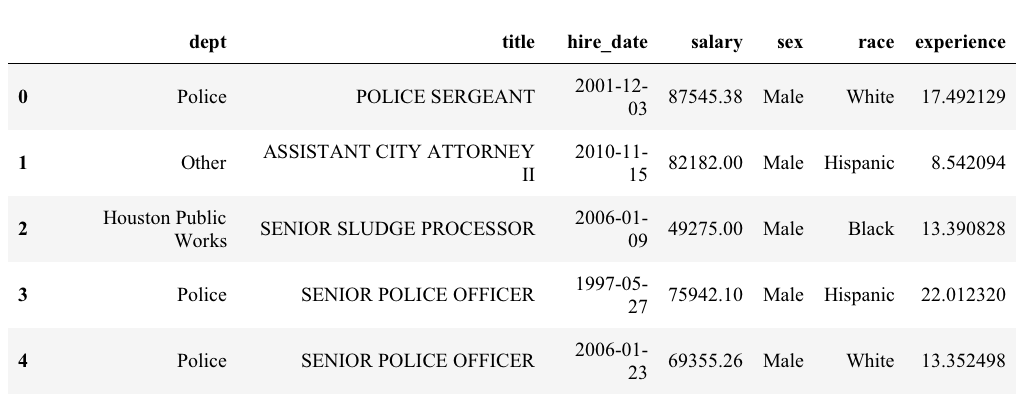

In [20]:
emp['experience'] = (pull_date - emp['hire_date']) / one_year
emp.head()

## 2. Introduction to Time Series

### Exercise 1
<span  style="color:green; font-size:16px">Read in the weather time series dataset and place the date column in the index.</span>

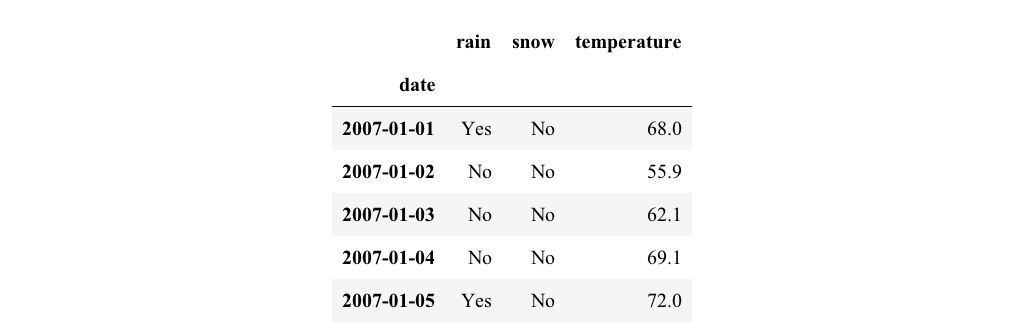

In [21]:
weather = pd.read_csv('../data/weather.csv', parse_dates=['date'], index_col='date')
weather.head()

### Exercise 2
<span  style="color:green; font-size:16px">What was the temperature on June 11, 2011?</span>

In [22]:
weather.loc['2011-6-11', 'temperature']

93.9

### Exercise 3
<span  style="color:green; font-size:16px">How many days did it rain during the last three months of 2011?</span>

In [23]:
weather.loc['2011-10':'2011-12', 'rain'].value_counts()

No     69
Yes    23
Name: rain, dtype: int64

### Exercise 4
<span  style="color:green; font-size:16px">Which year had more snow days, 2007 or 2012?</span>

In [24]:
weather.loc['2007', 'snow'].value_counts()

No     360
Yes      5
Name: snow, dtype: int64

In [25]:
weather.loc['2012', 'snow'].value_counts()

No     364
Yes      2
Name: snow, dtype: int64

### Exercise 5
<span  style="color:green; font-size:16px">Select every other thursday</span>

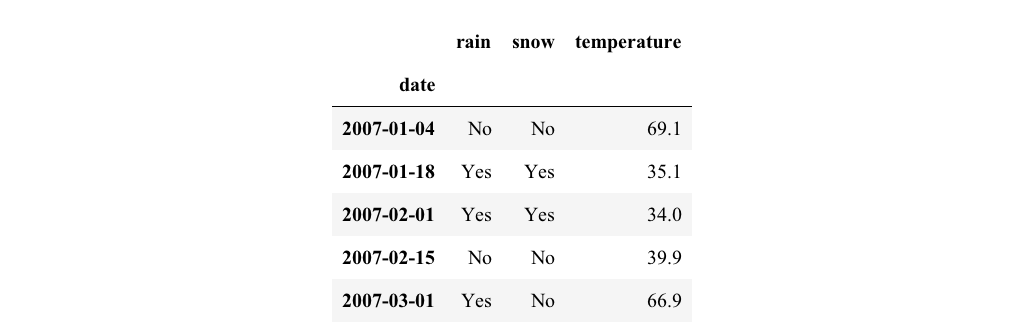

In [26]:
weather.asfreq('2W-THU').head()

### Exercise 6
<span  style="color:green; font-size:16px">Select the first day of each month.</span>

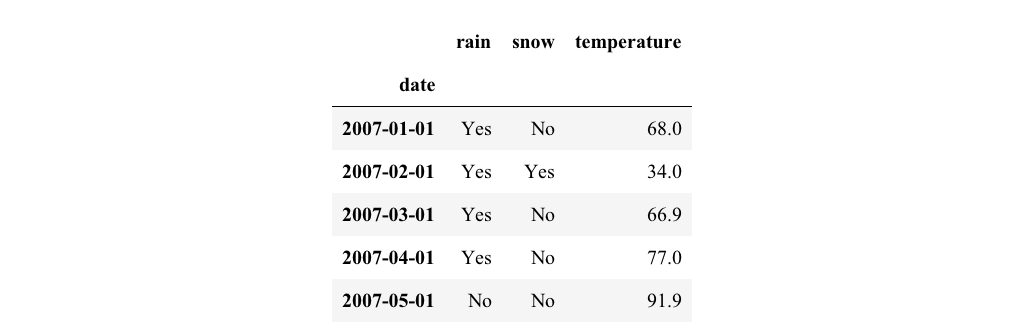

In [27]:
weather.asfreq('MS').head()

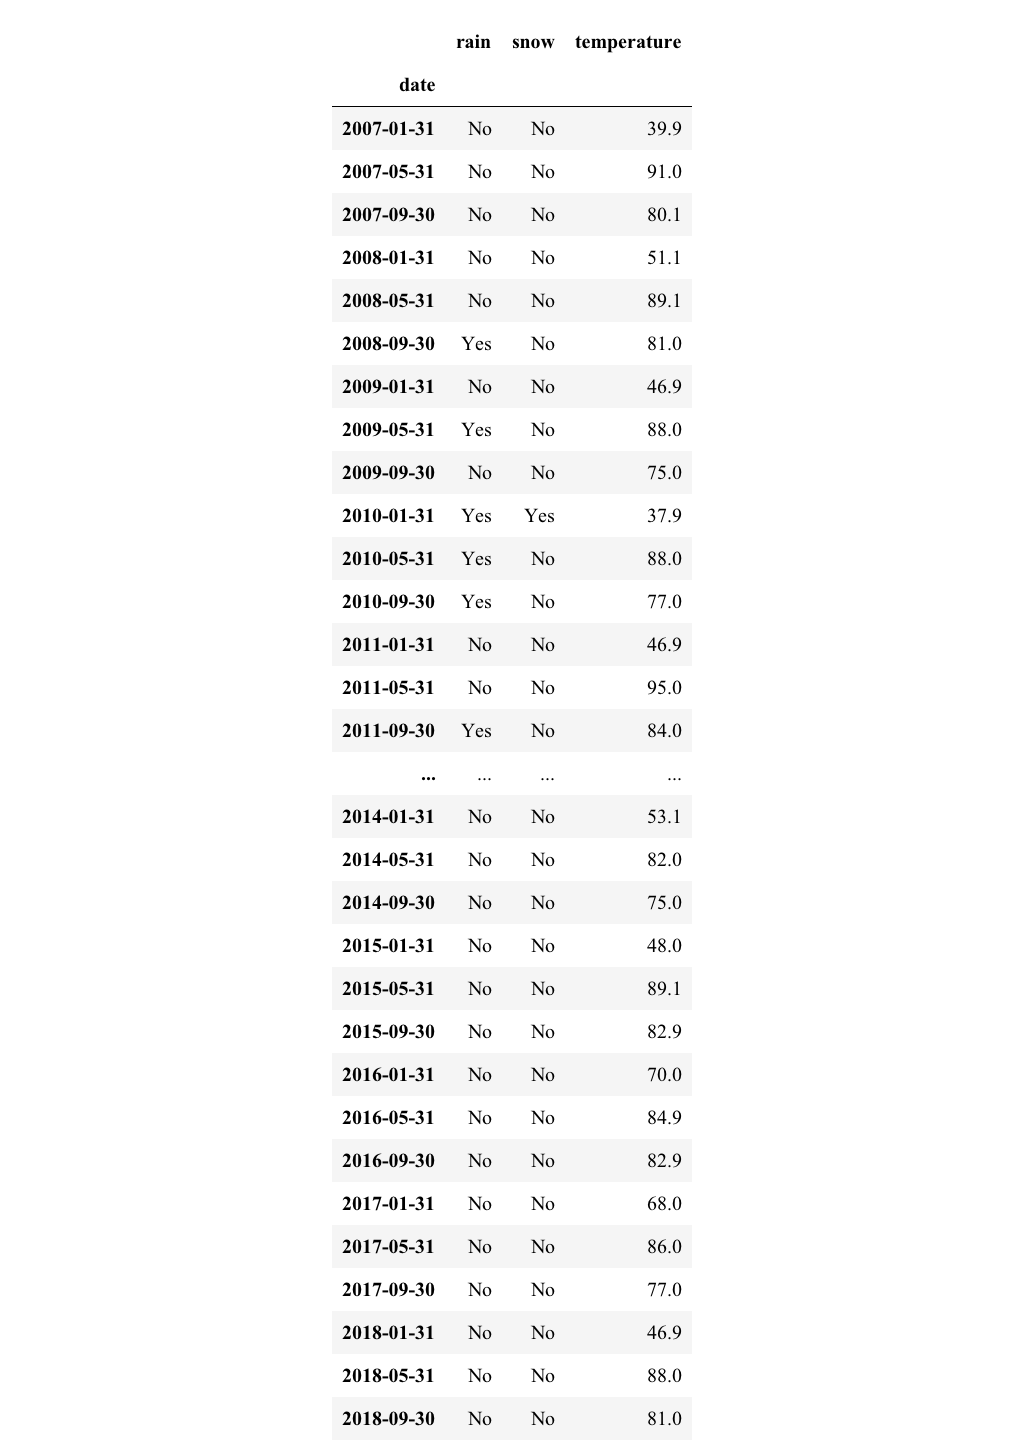

In [28]:
weather.asfreq('4M')

## 3. Grouping by Time

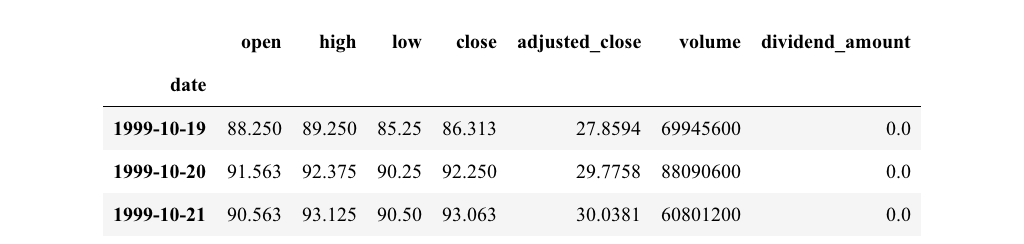

In [29]:
import pandas as pd
msft = pd.read_csv('../data/stocks/msft20.csv', parse_dates=['date'], index_col='date')
msft.head(3)

### Exercise 1
<span  style="color:green; font-size:16px">In which week did MSFT have the greatest number of its shares (volume) traded?</span>

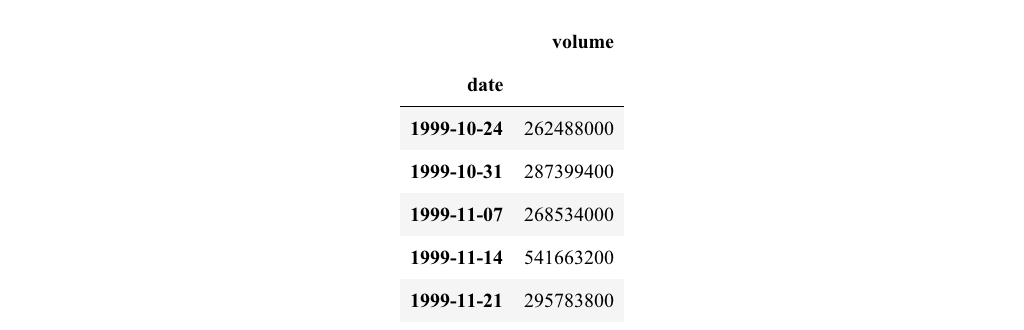

In [30]:
volume = msft.resample('W').agg({'volume':'sum'})
volume.head()

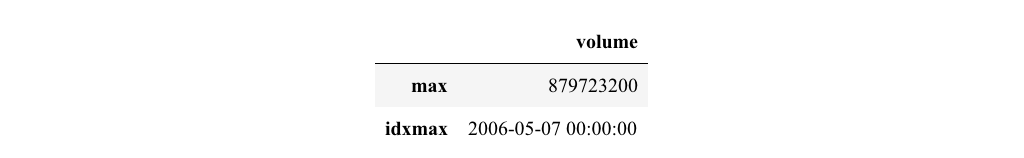

In [31]:
volume.agg(['max', 'idxmax'])

### Pandas Trick
Turn into a period to get Monday-Sunday date range

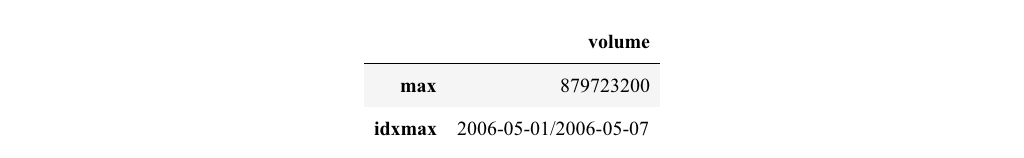

In [32]:
msft.resample('W', kind='period').agg({'volume':'sum'}).agg(['max', 'idxmax'])

### Exercise 2

<span  style="color:green; font-size:16px">With help from the `diff` method, find the quarter containing the most number of up days.</span>

Use diff to find the difference between the current row and the one directly above it.

In [33]:
msft['adjusted_close'].diff().head()

date
1999-10-19       NaN
1999-10-20    1.9164
1999-10-21    0.2623
1999-10-22   -0.1210
1999-10-25   -0.0807
Name: adjusted_close, dtype: float64

In [34]:
up_days = msft['adjusted_close'].diff() > 0
up_days.head()

date
1999-10-19    False
1999-10-20     True
1999-10-21     True
1999-10-22    False
1999-10-25    False
Name: adjusted_close, dtype: bool

In [35]:
up_days.resample('Q').sum().head()

date
1999-12-31    24.0
2000-03-31    32.0
2000-06-30    30.0
2000-09-30    23.0
2000-12-31    29.0
Freq: Q-DEC, Name: adjusted_close, dtype: float64

In [36]:
up_days.resample('Q').sum().agg(['max', 'idxmax'])

max                        43
idxmax    2001-12-31 00:00:00
Name: adjusted_close, dtype: object

### Pandas trick

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

Can visually verify with plot:

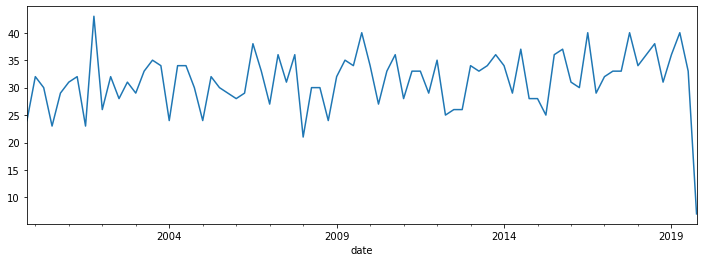

In [38]:
up_days.resample('Q', kind='period').sum().plot(figsize=(12,4))

### Exercise 3

<span  style="color:green; font-size:16px">Find the mean price per year along with the minimum and maximum volume.</span>

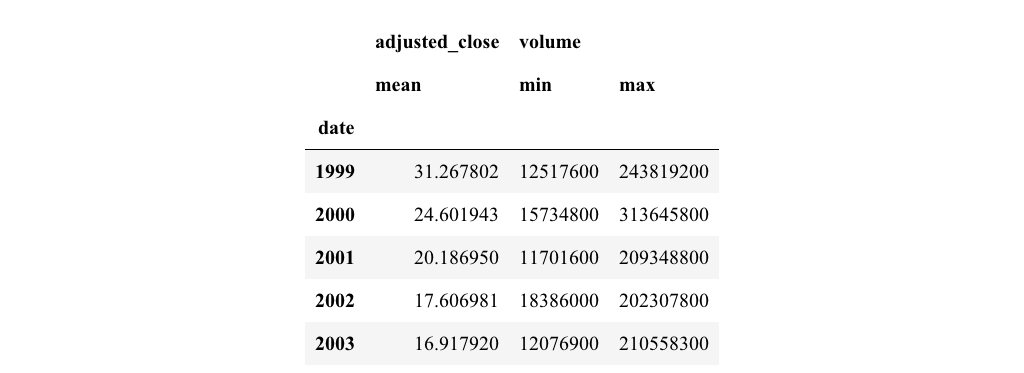

In [39]:
msft.resample('Y', kind='period').agg({'adjusted_close': 'mean', 
                                       'volume':['min', 'max']}).head()

Execute the cell below to read in the employee dataset and use it for the rest of the exercises.

In [40]:
emp = pd.read_csv('../data/employee.csv')

### Exercise 4

<span  style="color:green; font-size:16px">Use the `to_datetime` function to convert the hire date column into datetimes. Reassign this column in the `emp` DataFrame.</span>

In [41]:
emp['hire_date'] = pd.to_datetime(emp['hire_date'])

### Exercise 5

<span  style="color:green; font-size:16px">Without putting `hire_date` into the index, find the mean salary based on `hire_date` over 5 year periods. Also return the number of salaries used in the mean calculation for each period.</span>

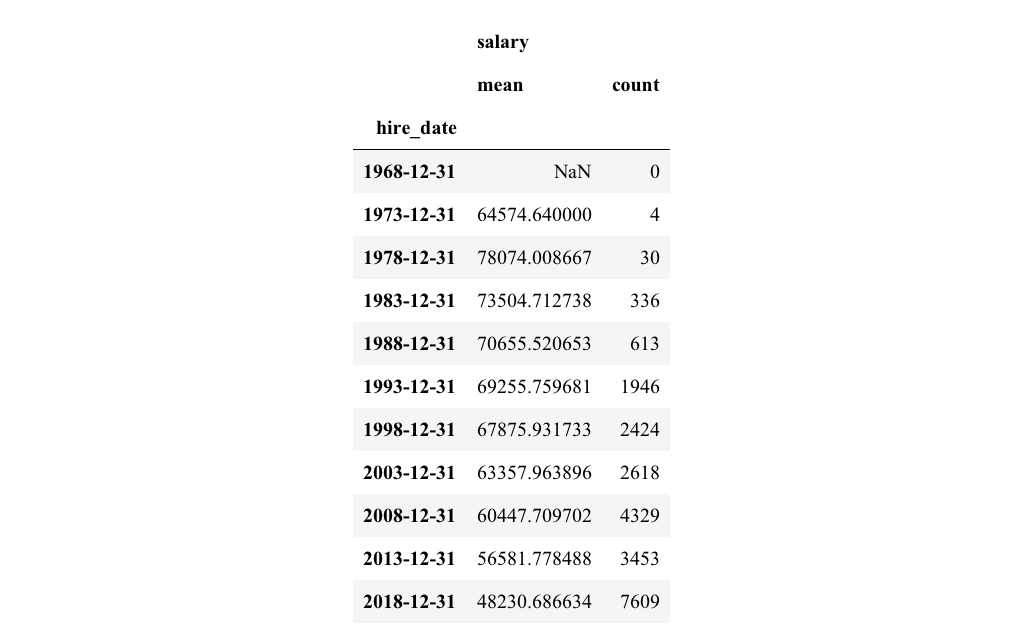

In [42]:
emp.resample('5Y', on='hire_date').agg({'salary':['mean', 'count']})

## 4. Rolling Windows

### Exercise 1
<span  style="color:green; font-size:16px">Attempt to take a rolling average on salary using a 30 day time span on hire date. Does the error message make sense?</span>

In [43]:
emp = pd.read_csv('../data/employee.csv', parse_dates=['hire_date'])

In [44]:
emp.rolling('30D', on='hire_date')

ValueError: hire_date must be monotonic

Yes, the error message makes sense. If you are going to do a rolling average by an amount of time, then the dates need to be sorted. Monotonic means all increasing or all decreasing.

### Exercise 2
<span  style="color:green; font-size:16px">Set hire date as the index and then select the salary column as a Series. Sort the Series by date and drop the missing values. Now select a subset that only has hire dates from 1990 onwards. Then find a 1,000 day rolling average. Finally make a call to the `plot` method. Make sure you inline matplotlib if you did not do it earlier.</span>

In [45]:
%matplotlib inline

In [46]:
sal = emp.set_index('hire_date')['salary'].sort_index().dropna()

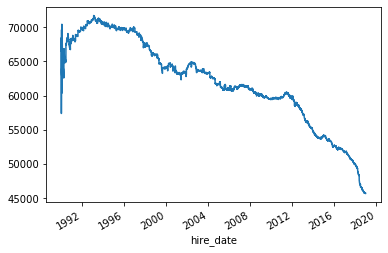

In [47]:
sal['1990':].rolling('1000D').mean().plot()

### Exercise 3
<span  style="color:green; font-size:16px">Read in the energy consumption dataset. Select just the residential source and plot a 12 month trailing rolling mean of the energy.</span>

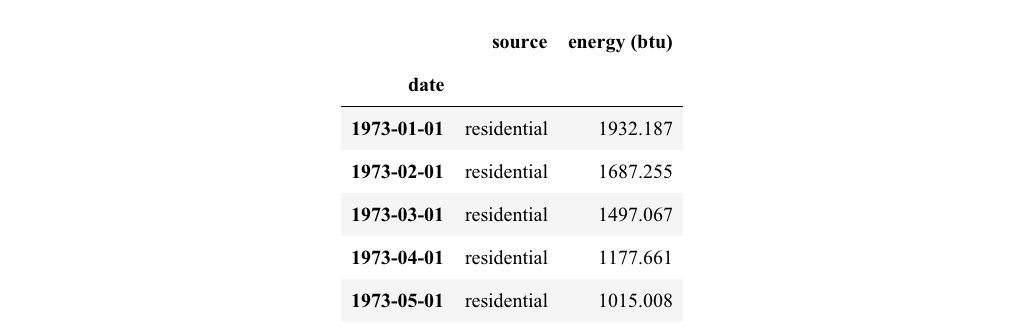

In [48]:
energy = pd.read_csv('../data/energy_consumption.csv', parse_dates=['date'], index_col='date')
energy.head()

In [49]:
filt = energy['source'] == 'residential'
res_energy = energy.loc[filt, 'energy (btu)']
res_energy.head()

date
1973-01-01    1932.187
1973-02-01    1687.255
1973-03-01    1497.067
1973-04-01    1177.661
1973-05-01    1015.008
Name: energy (btu), dtype: float64

If you try to use an offset alias here, you will get an error because Pandas does not consider a year to be a fixed frequency.

In [50]:
res_energy.rolling('Y').mean()

ValueError: <YearEnd: month=12> is a non-fixed frequency

Instead, you can use the integer 12 (assuming you check that there is data for each month).

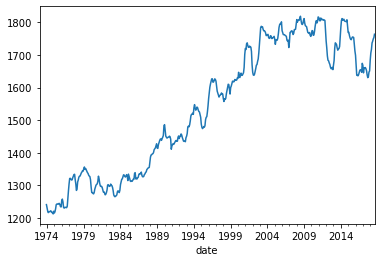

In [51]:
res_energy.rolling(12).mean().plot()

## 5. Grouping by Time and another Column

In [52]:
import numpy as np
import pandas as pd

### Exercise 1
<span  style="color:green; font-size:16px">Read in the energy consumption dataset. Find the average energy consumption per sector per 10 year time span beginning from the first year of data. Return the results as both a groupby and a pivot table. Experiment with adding 'S' to the end of your offset alias. How does this change the results?</span>

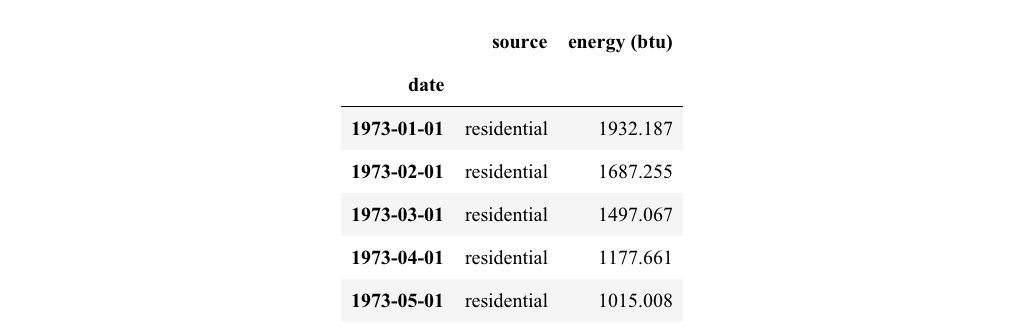

In [53]:
energy = pd.read_csv('../data/energy_consumption.csv', parse_dates=['date'], 
                     index_col='date')
energy.head()

By default, the offset alias 'Y' represents the year end. So the first date for each source is the time span of Jan 1, 1964 - Dec 31, 1973. It is instructive to also find the size of each group to determine how many rows were aggregated.

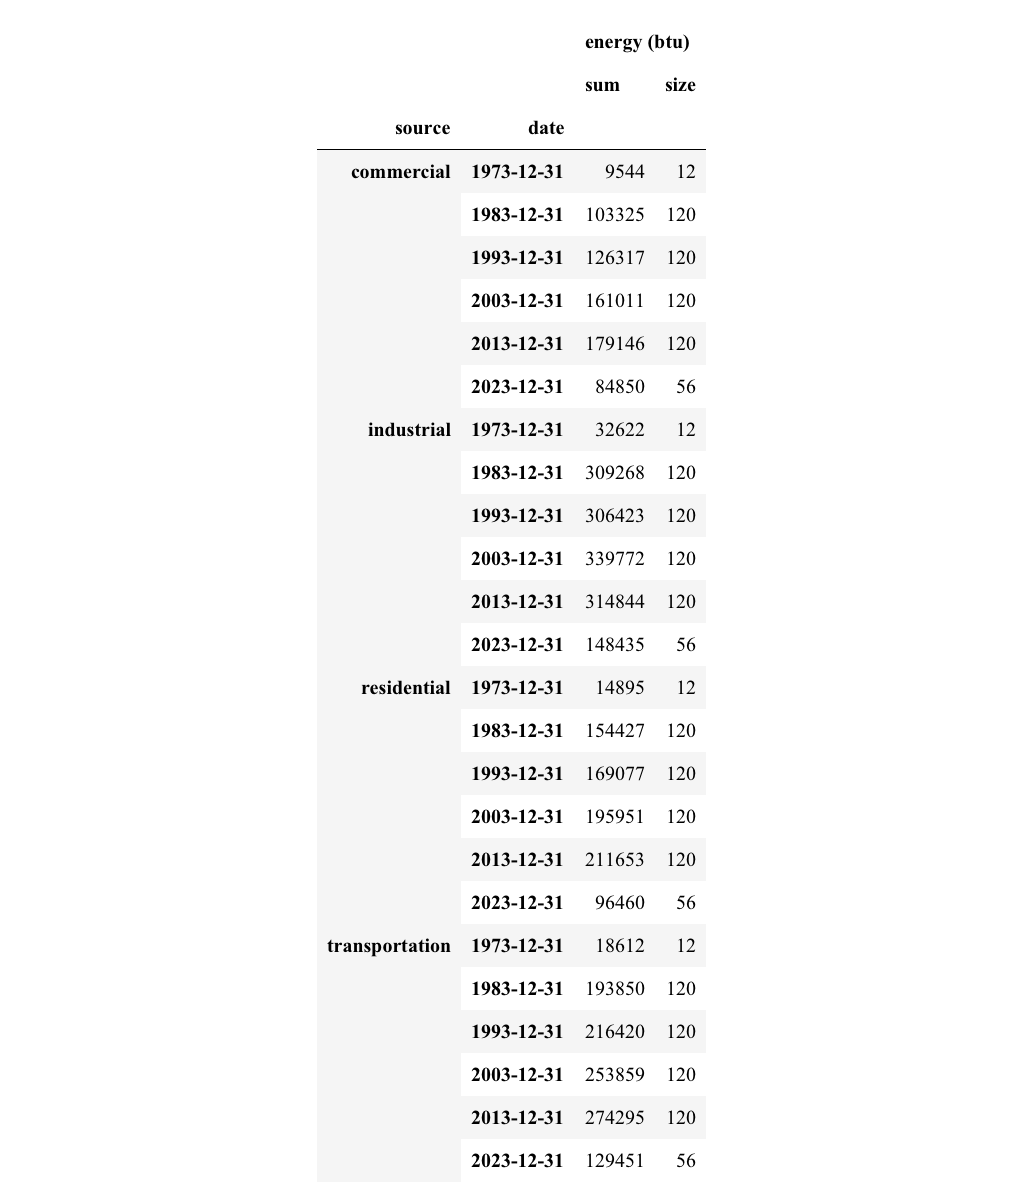

In [54]:
tg = pd.Grouper(freq='10Y')
energy.groupby(['source', tg]).agg({'energy (btu)':['sum', np.size]}).astype('int')

Appending an 'S' to the offset alias string makes pandas treat the first observation as the beginning of the time period. The first group is from Jan 1, 1973 to Dec 31, 1982 and this is likely what you would want.

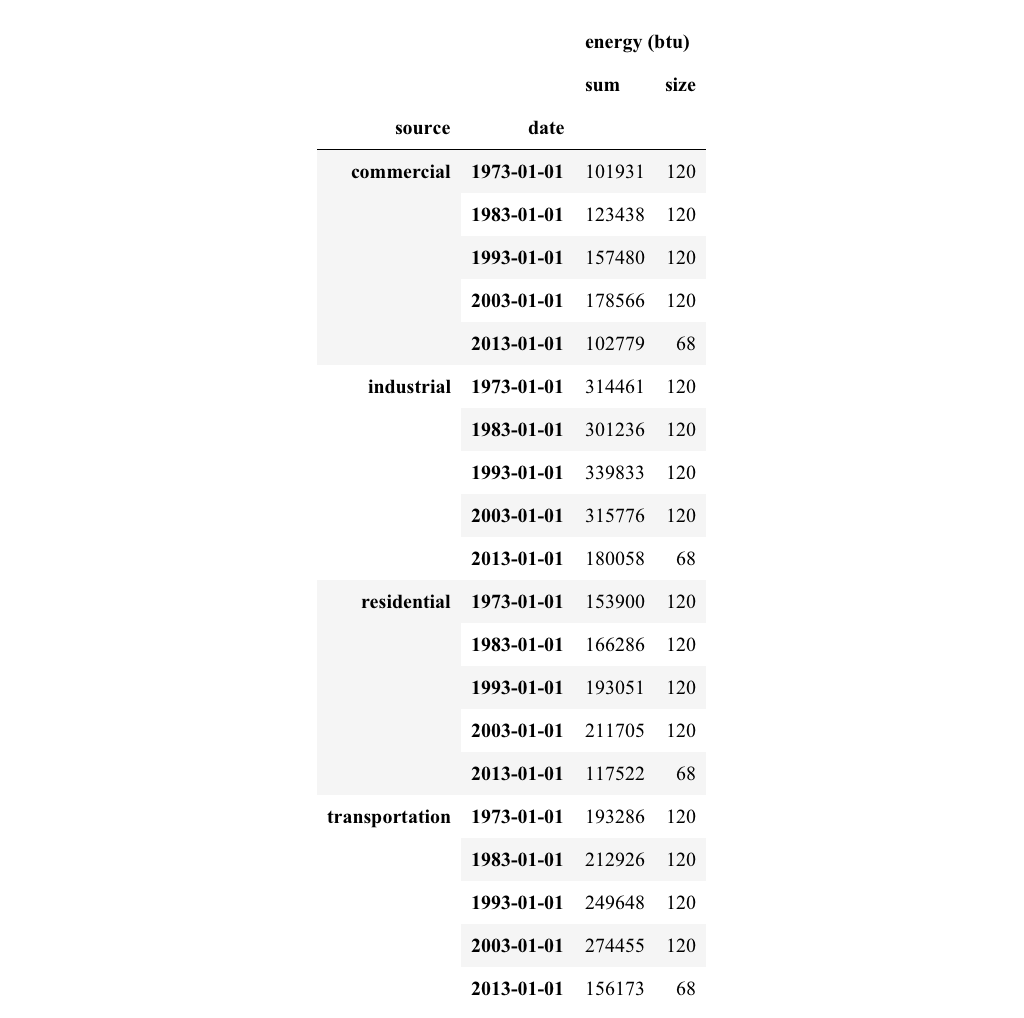

In [55]:
tg = pd.Grouper(freq='10YS')
energy.groupby(['source', tg]).agg({'energy (btu)':['sum', np.size]}).astype('int')

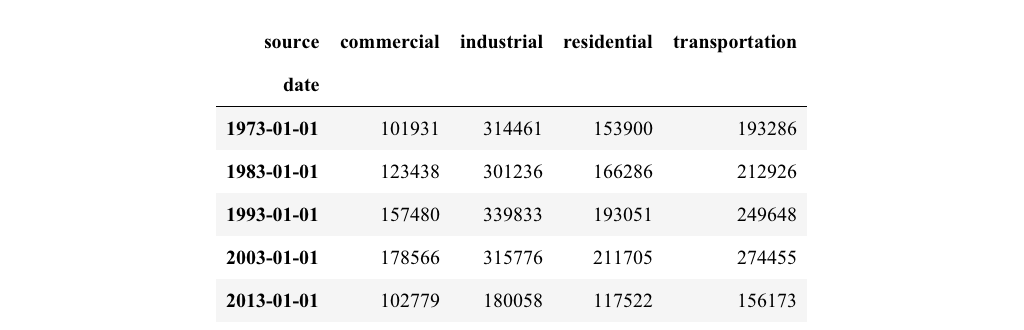

In [56]:
df = energy.pivot_table(index=tg, columns='source', 
                        values='energy (btu)', aggfunc='sum').astype('int')
df

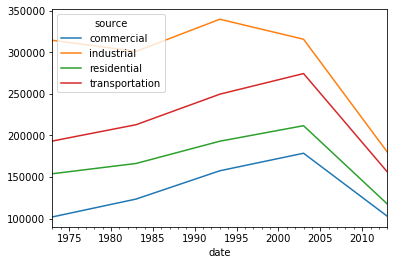

In [57]:
df.plot();